![Astrofisica Computacional](../logo.PNG)

---
## 01. Transformada de Fourier


Eduard Larrañaga (ealarranaga@unal.edu.co)

---



### Resumen

En este cuaderno se presentan las transformadas de Fourier de una función. 

---

Las transformadas de Fourier son una herramienta muy importante para entender, analizar suavizar y filtrar funciones o señales. También permiten resolver algunas ecuaciones diferenciales.

---
## Series de Fourier 

Consideraremos  una función periodica $f(x)$ en un intervalo finito $0\leq x < L$. Si la función es par (simétrica) con respecto al punto medio $x = \frac{L}{2}$, la función puede expandirse en ua serie de cosenos con la forma

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right).
\end{equation}

Si la función es impar con respecto al punto medio del intervalo, se puede expandir en términos de funciones seno,

\begin{equation}
f(x) = \sum_{k=1}^{\infty} \beta_k \sin \left( \frac{2\pi kx}{L} \right).
\end{equation}

En los dos casos, los coeficientes $\alpha_k$ y $\beta_k$ son constantes que determinan las diferentes contribuciones en la superposición. 

En el caso de una función general (sin una simetría especial), se puede realizar la expansión 

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right) + \sum_{k=1}^{\infty} \beta_k \sin \left( \frac{2\pi kx}{L} \right)
\end{equation}

la cual puede re-escribirse en términos de funciones exponenciales complejas,

\begin{equation}
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k \exp \left( i\frac{2\pi kx}{L} \right) 
\end{equation}

donde 

\begin{equation}
\gamma_k = 
\begin{cases}
\frac{1}{2}(\alpha_{-k} + i \beta_{-k}) & \text{ si }k<0\\
\alpha_0 & \text{ si }k=0\\
\frac{1}{2}(\alpha_{k} - i \beta_{k}) & \text{ si }k>0
\end{cases}
\end{equation}

Cuando la función $f(x)$ no es periodica, es posible realizar la expansión en serie de Fourier considerando la función en el intervalo $0\leq x <L$ y repitiendo este comportamiento una y otra vez a izquierda y derecha. Sin embargo, la serie obtenida solo será util en el intervalo considerado. 

---
### Coeficientes en la Serie de Fourier

Los coeficientes $\gamma_k$ son, en general, números complejos y pueden obtenerse mediante la expresión

\begin{equation}
\gamma_k = \frac{1}{L} \int_0^L f(x) \exp \left( -i\frac{2\pi kx}{L}\right) dx .
\end{equation}

## Transformada Discreta de Fourier (DFT)

A nivel computacional, la integral que define los coeficientes en la serie de Fourier debe realizarse numéricamente. Discretizando el intervalo de integración definiendo $n$ nodos, se tendran $N = n-1$ sub-intervalos con un tamaño $\Delta x = \frac{L}{N}$. Al utilizar la regla del trapezoide descrita en una clase anterior, se tiene

\begin{equation}
\gamma_k = \frac{1}{N}\left[ \frac{1}{2}f(0) + \frac{1}{2} f(L) + \sum_{j=1}^{N-1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right) \right].
\end{equation}

Ya que la función debe ser periodica en el intervalo de integración , se tiene $f(0) = f(L)$ y con ello los dos primeros terminos se pueden incorporar dentro de la sumatoria,

\begin{equation}
\gamma_k = \frac{1}{N}\sum_{j=0}^{N-1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right).
\end{equation}

Finalmente, debido a que los intervalos son iguales se puede escribir

\begin{equation}
x_j = \frac{j}{N}L
\end{equation}

Los coeficientes se pueden escribir en la forma

\begin{equation}
\gamma_k = \frac{1}{N}\sum_{j=0}^{N-1} f(x_j) \exp\left( -i \frac{2\pi kj}{N} \right).
\end{equation}

Aunque esta expresión yas corresponde a la transformada de Fourier, en muchas referencias bibliográficas se suele denominar *Transformada Discreta de Fourier (DFT)* a los coeficientes

\begin{equation}
c_k = \sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi kj}{N} \right)
\end{equation}

de tal forma que $c_k = N \gamma_k$ y donde se ha utilizado $f_j = f(x_j)$.

A partir de los coeficientes obtenidos se puede recuperar la discretización de la función. A esto se le denomina *Inversa de la Transformada Discreta de Fourier* y corresponde a la relación

\begin{equation}
f_j = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp\left( i \frac{2\pi kj}{N} \right).
\end{equation}

### DFT de una Función Real

Los resultados descritos arriba son aplicables a funciones reales o complejas. Sin embargo, en el caso de funciones reales el tiempo de computo de los coeficientes se puede reducir notablemente. 

Para comprender la razón, considere el coeficiente $c_k$ para un índice $k$ menor que $N$ pero mayor que $\frac{1}{2}N$. Se puede re-escribir entonces $k = N - \alpha$ con $1\leq \alpha < \frac{1}{2}N$. Se tiene entonces que

\begin{align}
c_{N-\alpha} = &\sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi (N-\alpha )j}{N} \right)\\ 
c_{N-\alpha} = & \sum_{j=0}^{N-1} f_j \exp\left( -i 2\pi j \right) \exp\left( i \frac{2\pi \alpha j}{N} \right) \\
c_{N-\alpha} = & \sum_{j=0}^{N-1} f_j  \exp\left( i \frac{2\pi \alpha j}{N} \right)\\
c_{N-\alpha} = & c^*_\alpha,
\end{align}

donde $^*$ signifca complejo conjugado y se ha utilizado la suposiciónd e una función real, i.e. $f^*(x) = f(x)$. Esta relación quiere decir que 

\begin{align}
c_{N-1} = &c^*_1 \\
c_{N-2} = &c^*_2 \\
c_{N-3} = &c^*_3 \\
...
\end{align}

Se concluye entonces que, para funciones reales, solo se deben calcular los coeficientes  $c_k$  para $0\leq k \leq \frac{1}{2}N$ y los demás quedan automáticamente definidos.

Cuando $N$ es par, se requiere calcular $\frac{1}{2}N + 1$ coeficientes, mientras que si $N$ es impar se requiere calcular $\frac{1}{2} (N+1)$ coeficientes.


### Ejemplo

En el archivo `signal.txt` se encuentran los datos de una señal para la cual calcularemos su DFT.

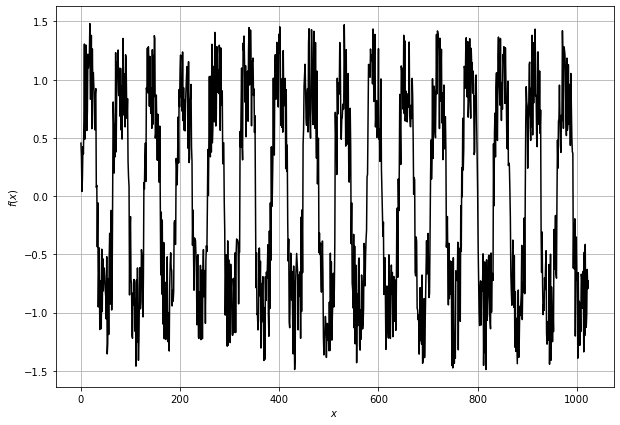

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
f_data = np.loadtxt( 'signal.txt')
x_data = np.arange(len(f_data))
plt.figure(figsize=(10,7))
plt.plot(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

El número total de datos es

In [2]:
n = len(f_data)
n

1024

In [4]:
c = np.zeros(n//2+1, complex)
for k in range(n//2+1):
    for i in range(n):
        c[k] += f_data[i]*np.exp(-2j*np.pi*k*i/n) 


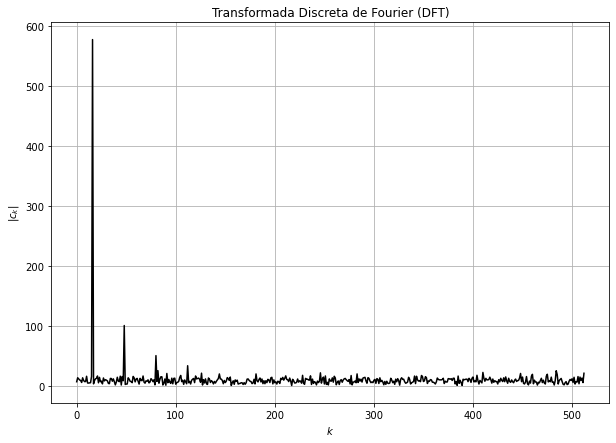

In [11]:
plt.figure(figsize=(10,7))
plt.plot(range(len(c)), abs(c), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|$')
plt.title(r'Transformada Discreta de Fourier (DFT)')
plt.grid()
plt.show()

## Transformada de Fourier 2-Dimensional

El desarrollo presentado se puede extender fácilmente al caso de funciones 2-dimensionales, $f(x,y)$. Para ello se realiza la DFT con respecto a una de las variables y luego con respecto a la otra variable de forma independiente.

Considere la función

\begin{equation}
f_{\mu, \nu} = f(x_\mu, y_\nu)
\end{equation}

con $\mu = 0, 1, 2, ..., m-1$ y $\nu = 0, 1, 2, ..., n-1$. Primero se realiza la transformada sobre cada una de $\mu$,

\begin{equation}
c'_{\mu, \beta} = \sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu}{N} \right),
\end{equation}

donde $N=n-1$. De esta forma, para cada $\mu$ se tienen $N$ coeficientes etiquetados con el índice $\beta$. 

Ahora se realiza la DFT para cada valor de $\beta$,

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}c'_{\mu,\beta} \exp \left( -i\frac{2\pi \alpha \mu}{M} \right),
\end{equation}

donde $M=m-1$. Al unir estas dos ecuaciones se obtiene la transformada 2-dimensional

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}\sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu}{N} \right) \exp \left( -i\frac{2\pi \alpha \mu}{M} \right)
\end{equation}

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{M-1}\sum_{\nu=0}^{N-1}f_{\mu,\nu} \exp \left[ -i2\pi \left(   \frac{ \alpha \mu}{M} + \frac{ \beta \nu}{N} \right) \right]
\end{equation}


De forma similar, la DFT inversa resulta ser

\begin{equation}
f_{\mu, \nu} = \frac{1}{MN} \sum_{\alpha=0}^{M-1}\sum_{\beta=0}^{N-1} c_{\alpha,\beta} \exp \left[ i2\pi \left(   \frac{ \alpha \mu}{M} + \frac{ \beta \nu}{N} \right) \right]
\end{equation}

---
## Transformada Rápida de Fourier (FFT)

Para realizar la DFT,

\begin{equation}
c_k = \sum_{j=0}^{N-1} f_j \exp\left( -i \frac{2\pi kj}{N} \right)
\end{equation}

se requiere calcular $\frac{1}{2} (N+1)$ coeficientes y en cada uno de ellos se deben sumar $N$ términos. Por ello el número total de operaciones es $\frac{1}{2} (N+1)N \sim \mathcal{O} \left( \frac{1}{2} n
N^2\right)$.

Para mejorar el tiempo de cálculo, se puede optimizar el proceso introduciendo la *Transformada Rápida de Fourier (FFT)*. Para compredner este procedimiento supondremos que la muestra tiene $N=2^m$ datos. Como $N$ es una potencia de $2$ es posible dividir la muestra en dos sub-conjuntos de igual tamaño: aquellos con $j$ par y aquellos con $j$ impar.

Para los datos pares, escribimos $j=2\alpha$ con $\alpha = 0,1,2,..,\frac{1}{2}N$ y con ello, la DFT toma la forma
 
\begin{equation}
E_k = \sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha} \exp\left( -i \frac{2\pi k(2\alpha )}{N} \right) = \sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}N} \right)
\end{equation}

que corresponde simplemente a una DFT con $\frac{1}{2}N$ datos. 

De forma similar, para los valores impares se escribe $j=2\alpha +1$ y al DFT toma la forma

\begin{equation}
\sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k(2\alpha +1)}{N} \right) = \exp\left( -i \frac{2\pi k}{N} \right) \sum_{\alpha=0}^{\frac{1}{2}N-1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}N} \right) = \exp\left( -i \frac{2\pi k}{N} \right) O_k
\end{equation}

donde $O_k$ es una DFT con $\frac{1}{2}N$ datos.

EL coeficiente de Fourier Completo se obtiene al sumar términos pares e impares, i.e.

\begin{equation}
c_k =E_k + \exp\left( -i \frac{2\pi k}{N} \right) O_k
\end{equation}

De esta expresión se puede notar que, para calcular el coeficiente $c_k$ en la DFT, se reuquiere calcular dos términos $E_k$ y $O_k$ que son dos DFT mas pequeños (con la mitad de los datos) y un factor (twiddle factor) que es trivial de calcular.
Este proceso de reducción puede repetirse nuevamente al dividir cada uno de los coeficientes en dos DFT mas pequeñas y un (twiddle) factor adicional. El proceso de sub-división se repite hasta que se llega al momento en el que cada DFT es la transformada de un solo dato. El coeficiente de Fourier correspondiente es simplemente

\begin{equation}
c_0 = \sum_{j=0}^{0} f_0 e^0 = f_0,
\end{equation}

es decir solo un término!!!

Para comprender porque se mejora el tiempo de calculo con este procedimiento, debemos notar que para descomponer completamente el conjunto de $2^m$ datos se requieren $m=\log_2 N$ niveles de división. Por lo tanto, el número de coeficientes que se deben calcular en todo el procesos es de $N$ en cada uno de los $\log_2 N$ niveles y por lo tanto el número total de operaciones involucradas es de $\mathcal{O} \left( N \log_2 N\right)$ el cual es mucho mejor que el orden $\mathcal{O} \left( \frac{1}{2} N^2\right)$ de la DFT.


Por ejemplo, para una muestra de $N= 10^6$ datos la DFT requiere $\mathcal{O} \left( \frac{1}{2} N^2\right) \sim 5 \times 10^{11}$ operaciones mientras que la FFT requiere  $\mathcal{O} \left( N \log_2 N\right) \sim 2 \times 10^7$ operaciones.

---
En python se tienen varias implementaciones de la FFT. Por ejemplo están las funciones 

- [scipy.fft](https://docs.scipy.org/doc/scipy/tutorial/fft.html)
- [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html)

In [8]:
from scipy.fft import fft

C = fft(f_data)
len(C)

1024

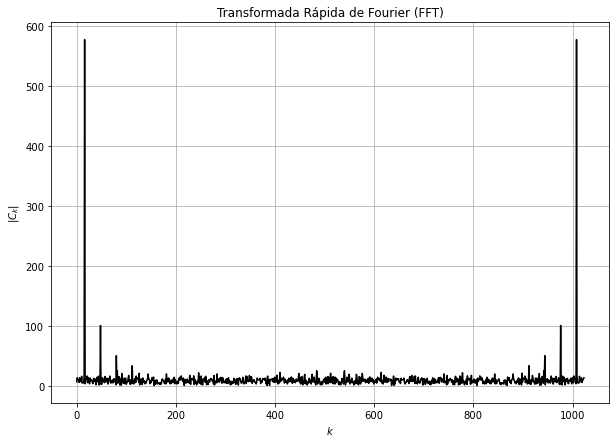

In [13]:
plt.figure(figsize=(10,7))
plt.plot(range(len(C)), abs(C), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| C_k \right|$')
plt.title(r'Transformada Rápida de Fourier (FFT)')
plt.grid()
plt.show()

---
## Filtrado de una Señal

Primero leeremos la señal cruda (señal+ruido) y la visualizamos

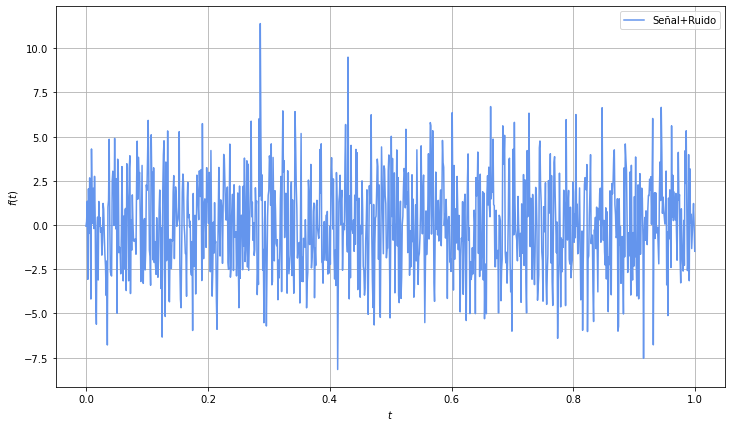

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
t, signal = np.loadtxt('synth_signal.txt', unpack=True)
clean_signal = np.loadtxt( 'clean_synth_signal.txt')
#minsignal, maxsignal = signal.min(), signal.max()

plt.figure(figsize=(12,7))
plt.plot(t, signal, color='cornflowerblue', label='Señal+Ruido')
#plt.plot(t, clean_signal, color='crimson', label='Señal')
plt.title('')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

La FFT de esta señal es

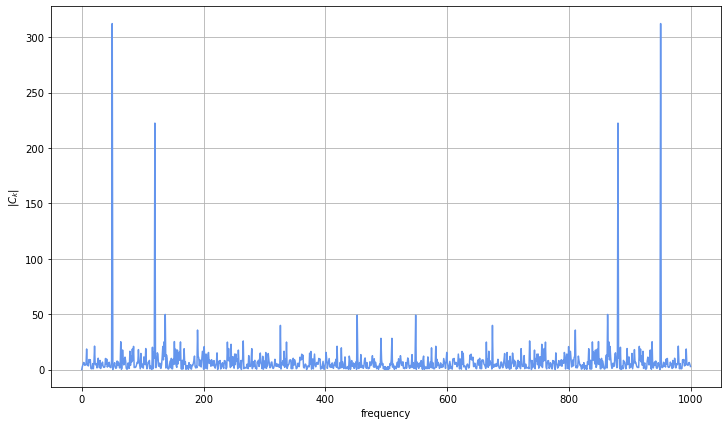

In [90]:
## Fast Fourier Transform
n = len(t)
c = np.fft.fft(signal, n) #computes the fft

psd = c*np.conj(c)/n
freq = (1/(dt*n)) * np.arange(n) #frequency array
#idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index

plt.figure(figsize=(12,7))
plt.plot(freq, abs(psd), color='cornflowerblue')
plt.title('')
plt.xlabel(r'frequency')
plt.ylabel(r'$\left| C_k \right|$')
plt.grid()
plt.show()

In [91]:
## Filter out noise
threshold = 100
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat #used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform

/Users/eduard/miniforge3/envs/ashcat/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


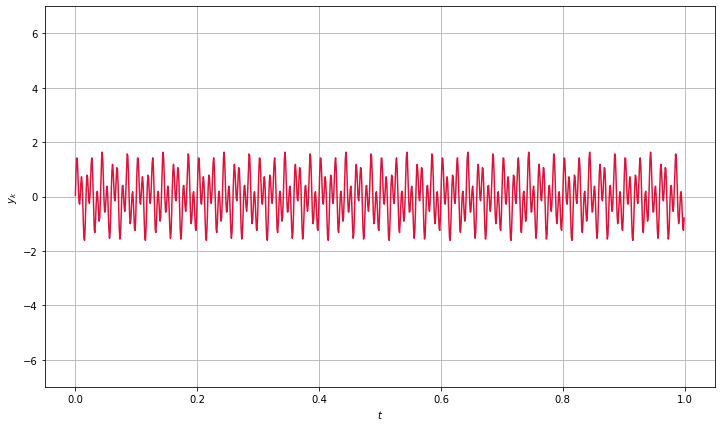

In [96]:
plt.figure(figsize=(12,7))
plt.plot(t, signal_filtered, color='crimson')
plt.ylim(-7,7)
plt.title('')
plt.xlabel(r'$t$')
plt.ylabel(r'$ y_k $')
plt.grid()
plt.show()

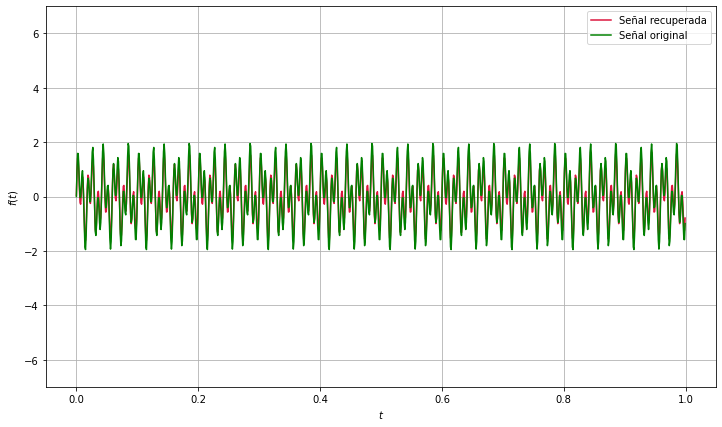

In [104]:
plt.figure(figsize=(12,7))
#plt.plot(t, signal, color='cornflowerblue', label='Señal+Ruido')
plt.plot(t, np.real(signal_filtered), color='crimson', label='Señal recuperada')
plt.plot(t, clean_signal, color='green', label='Señal original')
plt.title('')
plt.ylim(-7,7)
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$')
plt.legend()
plt.grid()
plt.show()

In [75]:
## Create synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #composite signal
signal_clean = signal #copy for later comparison
signal = signal + 2.5 * np.random.randn(len(t))

data = np.column_stack((t,signal))
np.savetxt('synth_signal.txt',data)
data = np.column_stack((t,signal_clean))
np.savetxt('clean_synth_signal.txt',signal_clean)